In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline 
# !pip install mpld3
# import mpld3
# mpld3.enable_notebook()

In [2]:
def sir_solution(
    N=1000,  # number of individuals 
    beta=1.0,  # infected person infects 1 other person per day
    D=4.0, 
    gamma=None, 
    S0=999,  # Initially 999 susceptibel
    I0=1,  # Initially  1 infected
    R0=0,  # Initially 0 removed
    end_day=50,
    num_gridpoints=51
):
    def f(t, y, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return np.array([dSdt, dIdt, dRdt])
    
    if gamma is None:
        gamma = 1 / D
    return solve_ivp(
        fun=f, 
        t_span=[0, end_day], 
        y0=(S0, I0, R0),
        t_eval=np.linspace(0, end_day, num_gridpoints),
        args=(N, beta, gamma))
    

In [3]:
ret = sir_solution(beta=4)

In [4]:
def plotsir(ret):
    t = ret.t
    S, I, R = ret.y
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)


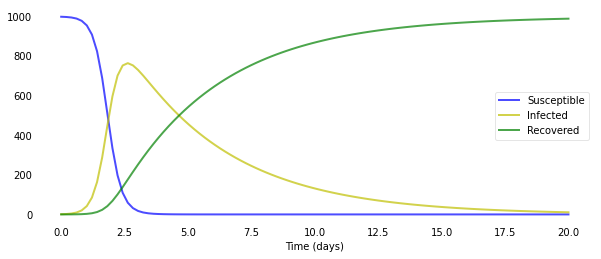

In [5]:
plotsir(sir_solution(beta=4, end_day=20, num_gridpoints=100))